In [1]:
import pandas as pd                                     # Manipulasi dan analisis data tabular
import numpy as np                                      # Operasi numerik dan manipulasi array
import seaborn as sns                                   # Visualisasi data berbasis statistik
import matplotlib.pyplot as plt                         # Membuat grafik dan plot untuk analisis data
import scipy.stats as stats                             # Fungsi statistik dan distribusi probabilitas
import time                                             # Pengukuran dan manajemen waktu dalam program

from scipy.stats import pearsonr                        # Menghitung korelasi Pearson antara dua variabel numerik

In [2]:
data = pd.read_csv("dataset/P2_FinPro_Final_Record.csv")

In [3]:
data

,id,gender,car,realty,child_number,income,occupation,education,marital_status,house_type,...,mobile_phone,work_phone,phone,email,family_size,months_balance,status,begin_month,credit_approval,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,0,C,-15,No,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-1,C,-15,No,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-2,C,-15,No,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-3,C,-15,No,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,2.0,-4,C,-15,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-9,0,-13,No,1
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-10,2,-13,No,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-11,1,-13,No,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,1,0,0,0,1.0,-12,0,-13,No,1


In [5]:
categorical_columns = ['gender',
                       'car',
                       'realty',
                       'occupation',
                       'education',
                       'marital_status',
                       'house_type',
                       'status',
                       'credit_approval']

for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in gender: ['M' 'F']
Unique values in car: ['Y' 'N']
Unique values in realty: ['Y' 'N']
Unique values in occupation: ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
Unique values in education: ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Unique values in marital_status: ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
Unique values in house_type: ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
Unique values in status: ['C' '1' '0' 'X' '5' '4' '3' '2']
Unique values in credit_approval: ['No' 'Yes']


___

In [ ]:
# Filter only numeric columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create a list object to store skewness data
listItem = []

for col in numerical_columns:  # Create a loop to check the distribution of numerical data
    listItem.append([
        col,
        round(df[col].skew(), 1),
        np.where(
            (round(df[col].skew(), 1) <= 0.5) & (round(df[col].skew(), 1) >= -0.5),
            'normal',
            'skewed'
        )
    ])

# Convert the results into a DataFrame to display skewness values
skewness = pd.DataFrame(columns=['Column Name', 'Skewness Value', 'Data Distribution'], data=listItem)
skewness

,Column Name,Skewness Value,Data Distribution
0,CNT_CHILDREN,2.6,skewed
1,AMT_INCOME_TOTAL,2.6,skewed
2,DAYS_BIRTH,-0.2,normal
3,DAYS_EMPLOYED,1.8,skewed
4,FLAG_MOBIL,0.0,normal
5,FLAG_WORK_PHONE,1.3,skewed
6,FLAG_PHONE,0.9,skewed
7,FLAG_EMAIL,2.8,skewed
8,CNT_FAM_MEMBERS,1.3,skewed
9,MONTHS_BALANCE,-0.6,skewed


In [ ]:
# Create lists to store column names, lower bounds, upper bounds, and outlier percentages
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

# Loop through each numerical column to determine outlier thresholds based on skewness
for row in range(len(skewness)):
    col = skewness['Column Name'][row]

    # Define lower and upper bounds based on data distribution
    if skewness['Data Distribution'][row] == 'skewed':
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (IQR * 3)
        upper_boundary = df[col].quantile(0.75) + (IQR * 3)
    else:
        lower_boundary = df[col].mean() - 3 * df[col].std()
        upper_boundary = df[col].mean() + 3 * df[col].std()

    # Store the results in the corresponding lists
    column.append(col)
    lower_bound.append(lower_boundary)
    upper_bound.append(upper_boundary)

    # Calculate the percentage of outliers in the column
    totalpercent = (
        (len(df[df[col] > upper_boundary]) / len(df) * 100) +
        (len(df[df[col] < lower_boundary]) / len(df) * 100)
    )
    percent_total_outlier.append(round(totalpercent, 2))

# Create a DataFrame to display outlier percentages
outliers = pd.DataFrame({
    'Column Name': column,
    'Outlier Percentage': percent_total_outlier
})

# Display the result
outliers

,Column Name,Outlier Percentage
0,CNT_CHILDREN,0.06
1,AMT_INCOME_TOTAL,1.26
2,DAYS_BIRTH,0.00
3,DAYS_EMPLOYED,17.13
4,FLAG_MOBIL,0.00
5,FLAG_WORK_PHONE,23.18
6,FLAG_PHONE,0.00
7,FLAG_EMAIL,9.17
8,CNT_FAM_MEMBERS,0.06
9,MONTHS_BALANCE,0.00


___

In [ ]:
# Initialize a list to store Spearman correlation results
spearman_correlation_results = []

# Calculate Spearman correlation and p-value between each numerical column and 'STATUS'
for col in numerical_columns:
    spearman_corr, p_value = stats.spearmanr(df[col], df['STATUS'])
    spearman_correlation_results.append([col, round(spearman_corr, 3), round(p_value, 5)])

# Create a DataFrame to display Spearman correlation results
spearman_df = pd.DataFrame(spearman_correlation_results, columns=['Numerical Column', 'Spearman Correlation', 'P-Value'])

# Initialize a list to store Chi-Square test results
chi_square_results = []

# Create contingency tables and calculate Chi-Square statistic and p-value for each categorical column with respect to 'STATUS'
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['STATUS'])
    chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
    chi_square_results.append([col, round(chi2_stat, 3), round(p_value, 5)])

# Create a DataFrame to display Chi-Square test results
chi_square_df = pd.DataFrame(chi_square_results, columns=['Categorical Column', 'Chi-Square Statistic', 'P-Value'])
chi_square_df

C:\Users\Yonathan Anggraiwan\AppData\Local\Temp\ipykernel_21740\1750742267.py:6: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, p_value = stats.spearmanr(df[col], df['STATUS'])


,Categorical Column,Chi-Square Statistic,P-Value
0,CODE_GENDER,375.822,0.0
1,FLAG_OWN_CAR,130.916,0.0
2,FLAG_OWN_REALTY,159.293,0.0
3,NAME_INCOME_TYPE,525.167,0.0
4,NAME_EDUCATION_TYPE,1057.599,0.0
5,NAME_FAMILY_STATUS,635.277,0.0
6,NAME_HOUSING_TYPE,565.588,0.0
7,OCCUPATION_TYPE,2731.867,0.0
8,STATUS,5444005.000,0.0


In [ ]:
spearman_df

,Numerical Column,Spearman Correlation,P-Value
0,CNT_CHILDREN,0.000,0.91546
1,AMT_INCOME_TOTAL,0.002,0.08108
2,DAYS_BIRTH,0.011,0.00000
3,DAYS_EMPLOYED,-0.008,0.00000
4,FLAG_MOBIL,NaN,NaN
5,FLAG_WORK_PHONE,0.013,0.00000
6,FLAG_PHONE,0.006,0.00000
7,FLAG_EMAIL,-0.012,0.00000
8,CNT_FAM_MEMBERS,0.003,0.01379
9,MONTHS_BALANCE,0.089,0.00000


In [ ]:
print(df['FLAG_MOBIL'].value_counts())

FLAG_MOBIL
1    777715
Name: count, dtype: int64


Cuman ada 1 tipe value data dalam kolom "FLAG_MOBIL" makanya insufficient variation NaN.
___

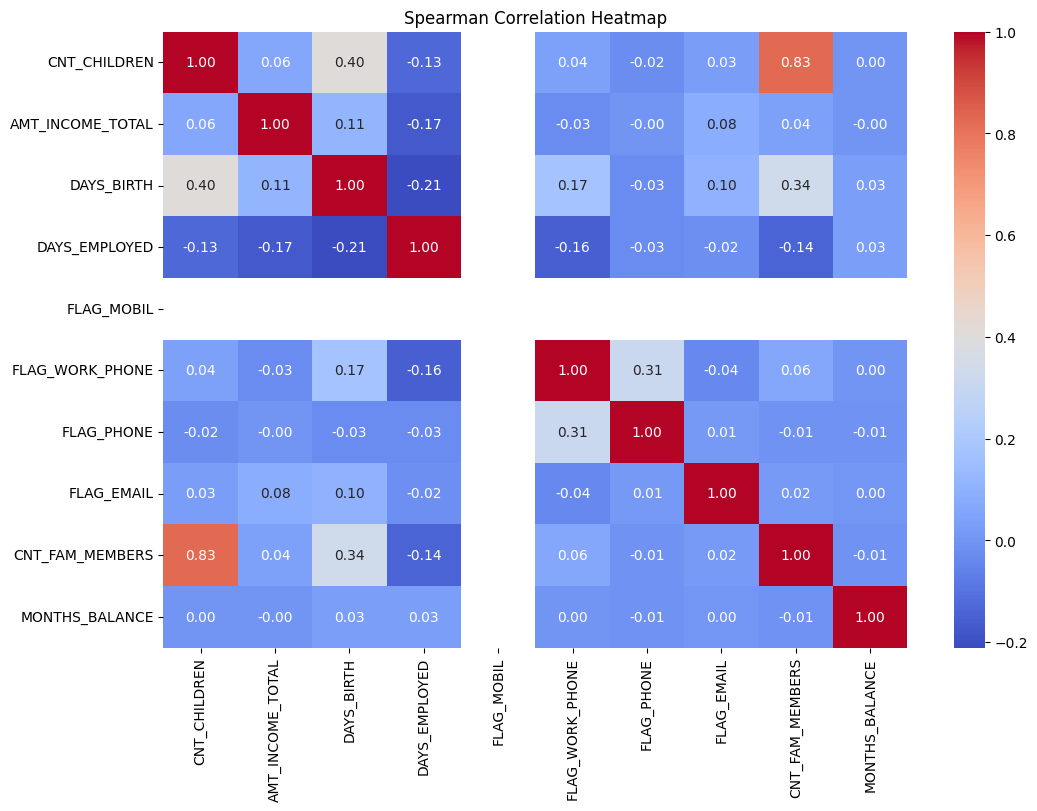

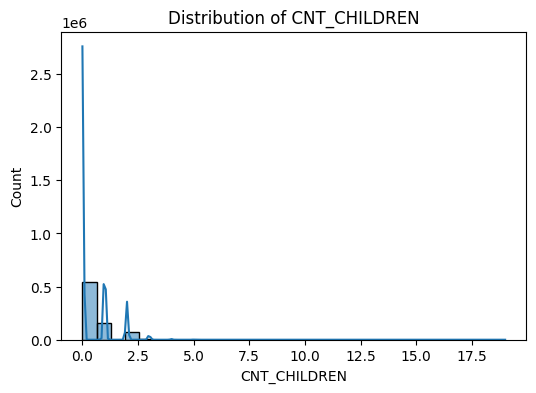

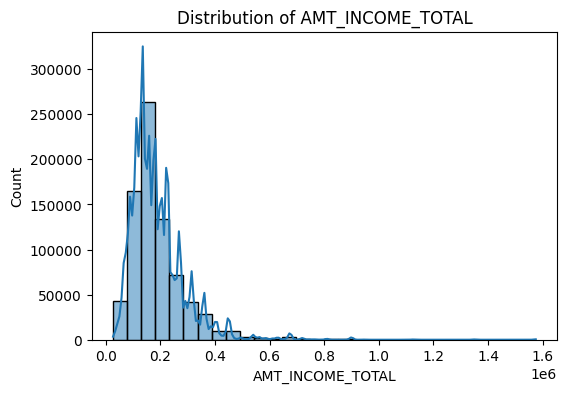

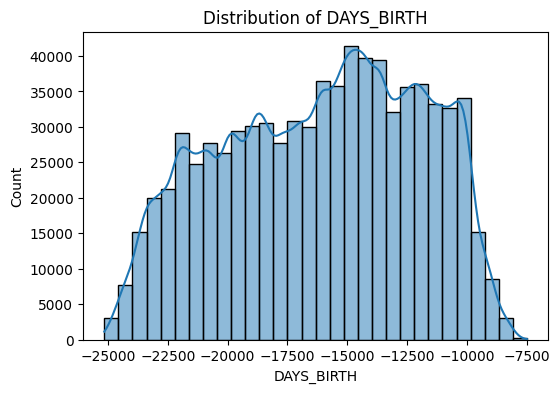

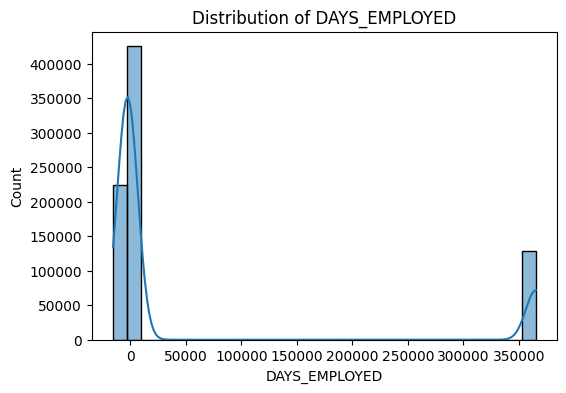

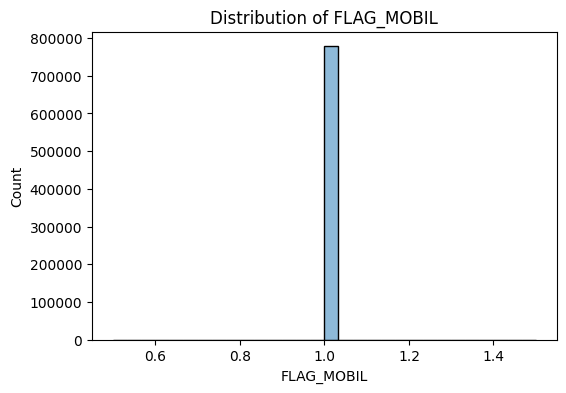

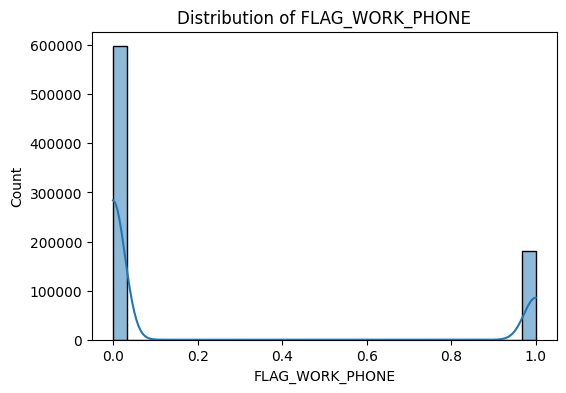

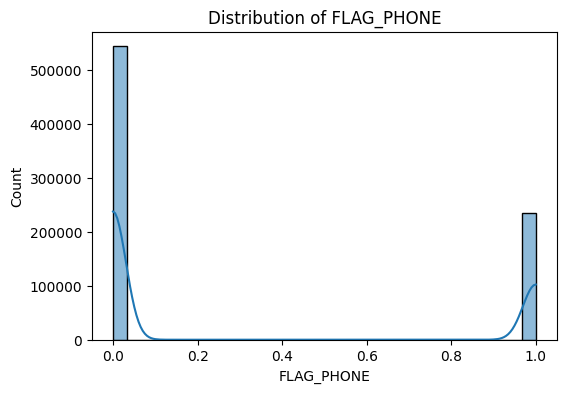

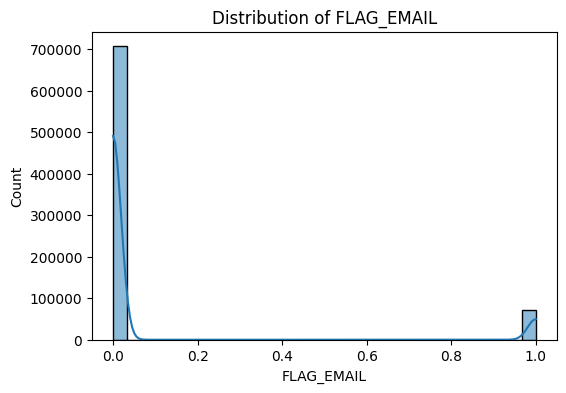

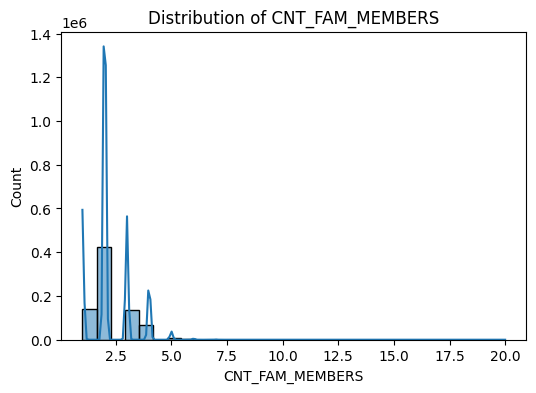

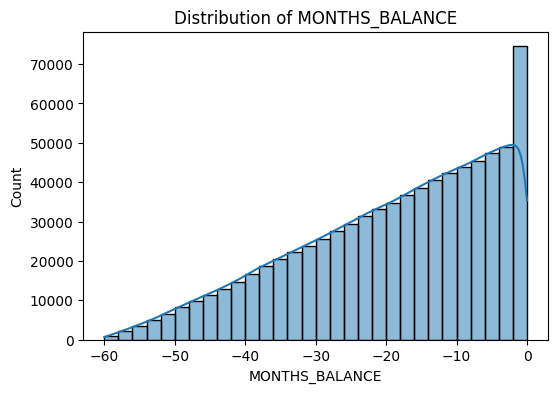

In [ ]:
# Heatmap for numerical correlations
corr_matrix = df[numerical_columns].corr(method='spearman')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

# Distribution plots
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


___

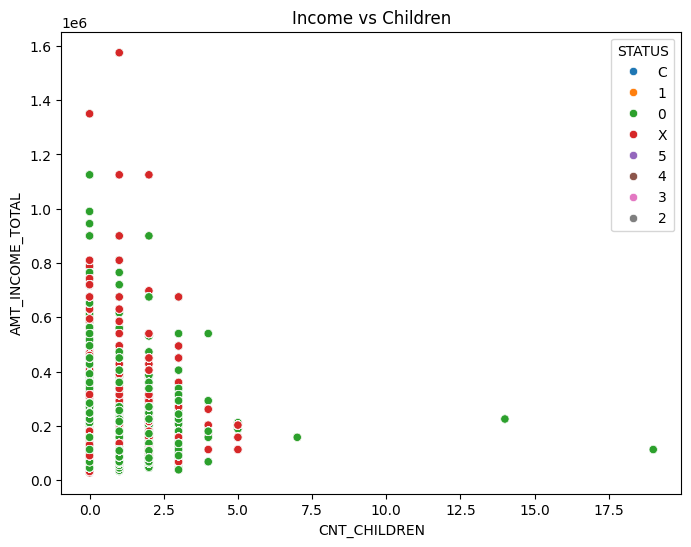

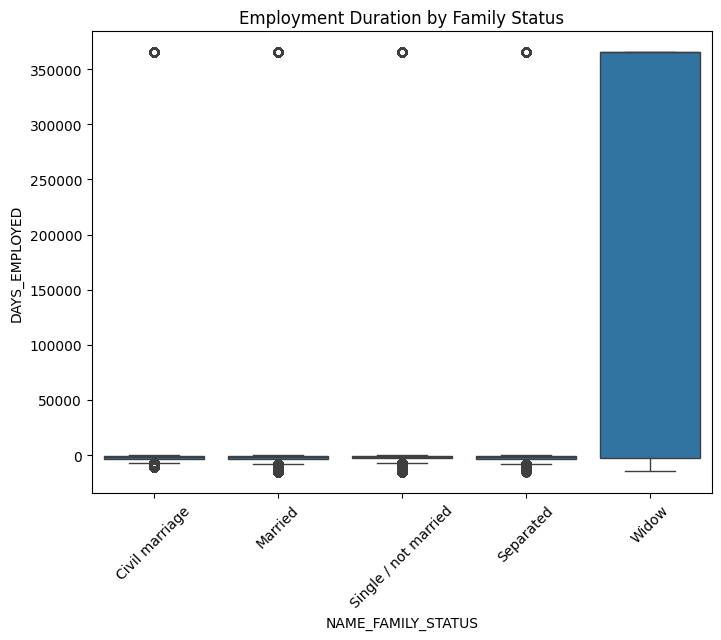

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CNT_CHILDREN', y='AMT_INCOME_TOTAL', hue='STATUS')
plt.title('Income vs Children')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='NAME_FAMILY_STATUS', y='DAYS_EMPLOYED')
plt.xticks(rotation=45)
plt.title('Employment Duration by Family Status')
plt.show()

___

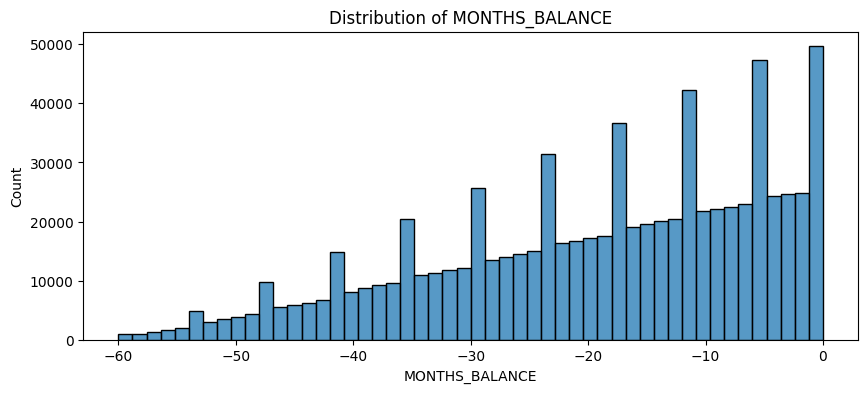

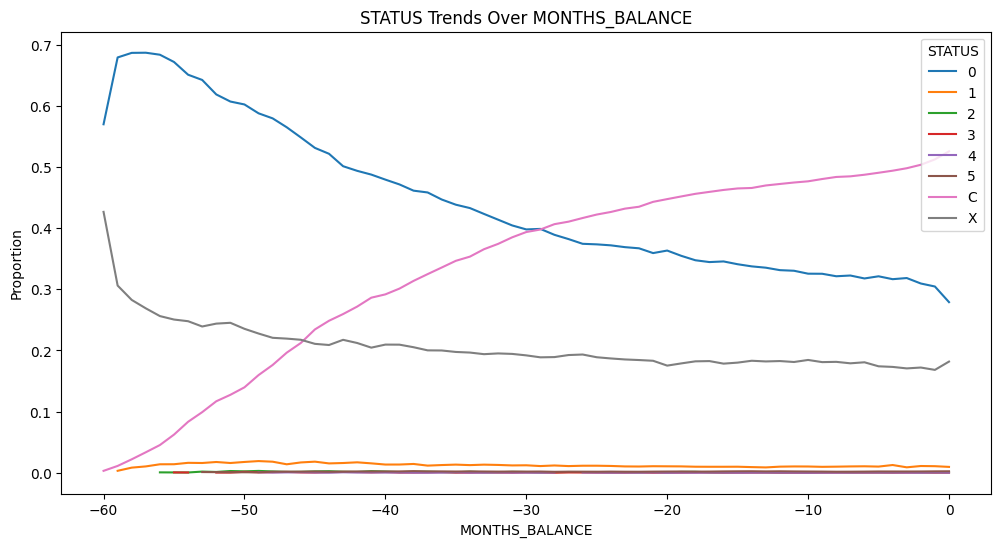

In [ ]:
# Jika MONTHS_BALANCE adalah time-like
plt.figure(figsize=(10, 4))
sns.histplot(df['MONTHS_BALANCE'].dropna(), bins=50)
plt.title('Distribution of MONTHS_BALANCE')
plt.show()

# Pergerakan nilai terhadap waktu (jika bernilai positif)
if df['MONTHS_BALANCE'].nunique() > 1:
    df_time = df.groupby('MONTHS_BALANCE')['STATUS'].value_counts(normalize=True).unstack()
    df_time.plot(kind='line', figsize=(12, 6))
    plt.title('STATUS Trends Over MONTHS_BALANCE')
    plt.ylabel('Proportion')
    plt.show()

___

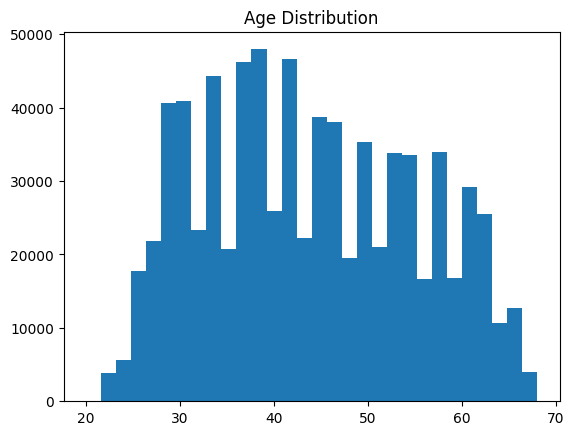

In [ ]:
# Kolom Age dari DAYS_BIRTH
df['AGE'] = (-df['DAYS_BIRTH']) // 365
plt.hist(df['AGE'], bins=30)
plt.title('Age Distribution')
plt.show()

# Kategorisasi pendapatan
df['IncomeGroup'] = pd.qcut(df['AMT_INCOME_TOTAL'], q=3, labels=['Low', 'Mid', 'High'])


___

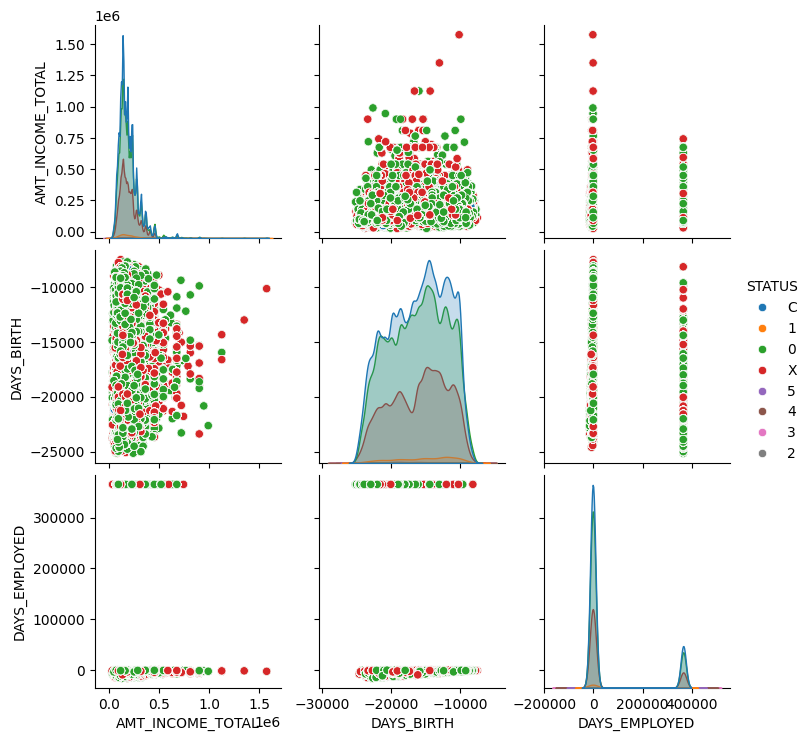

In [ ]:
sns.pairplot(df, vars=['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED'], hue='STATUS')

___

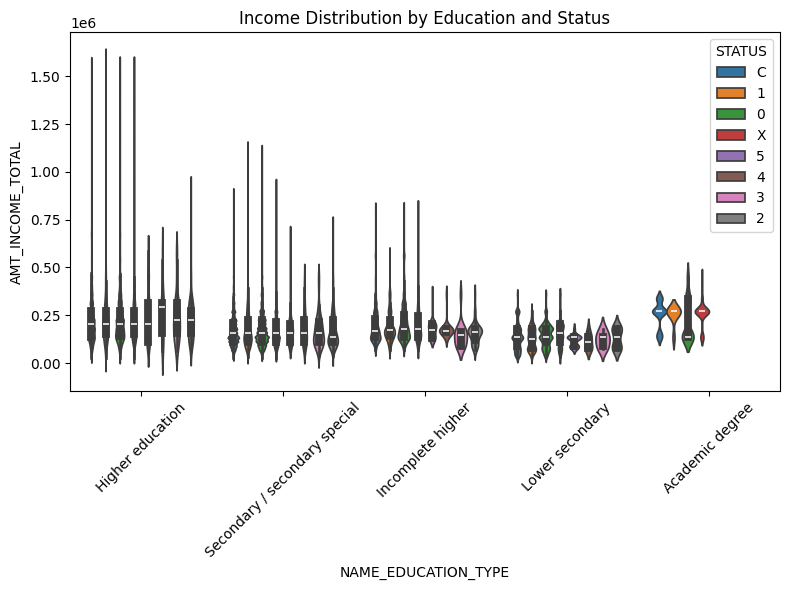

In [ ]:
plt.figure(figsize=(8,6))
sns.violinplot(x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', hue='STATUS', data=df)
plt.xticks(rotation=45)
plt.title('Income Distribution by Education and Status')
plt.tight_layout()
plt.show()

___

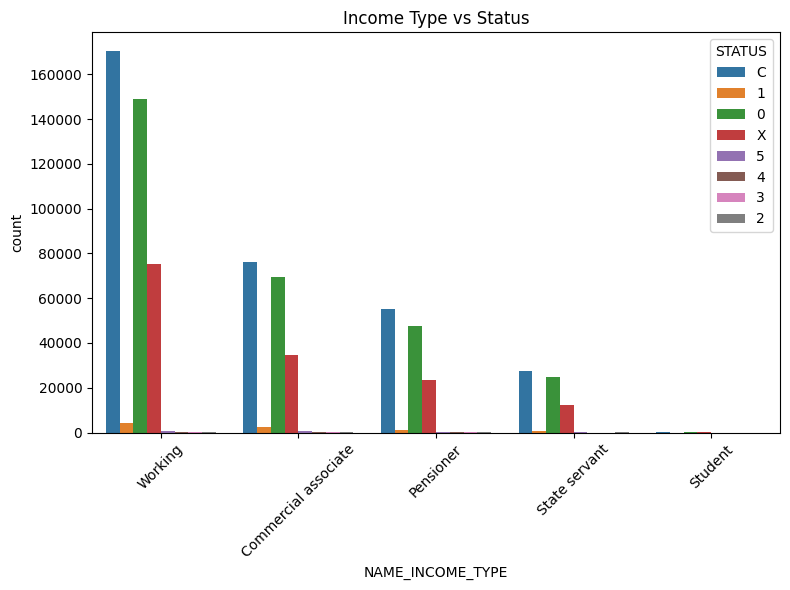

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='NAME_INCOME_TYPE', hue='STATUS')
plt.title('Income Type vs Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

___

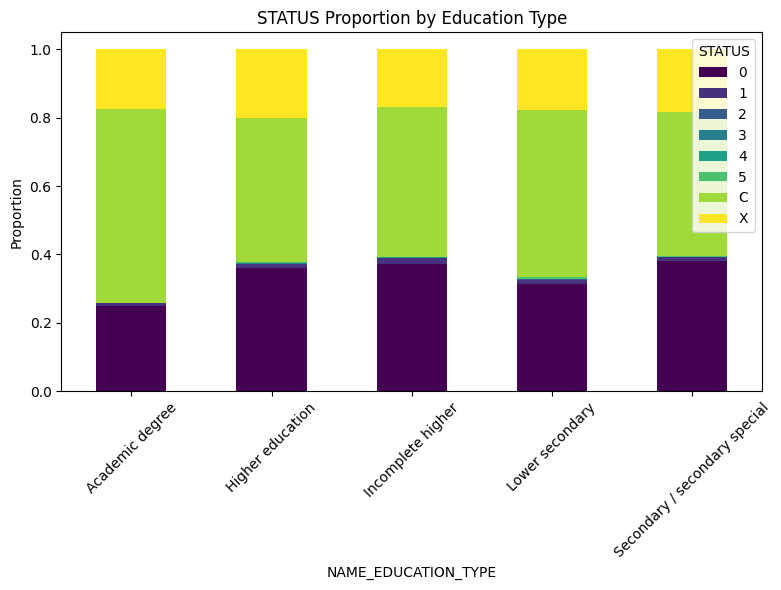

In [ ]:
status_by_edu = pd.crosstab(df['NAME_EDUCATION_TYPE'], df['STATUS'], normalize='index')
status_by_edu.plot(kind='bar', stacked=True, figsize=(8,6), colormap='viridis')
plt.title('STATUS Proportion by Education Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


___

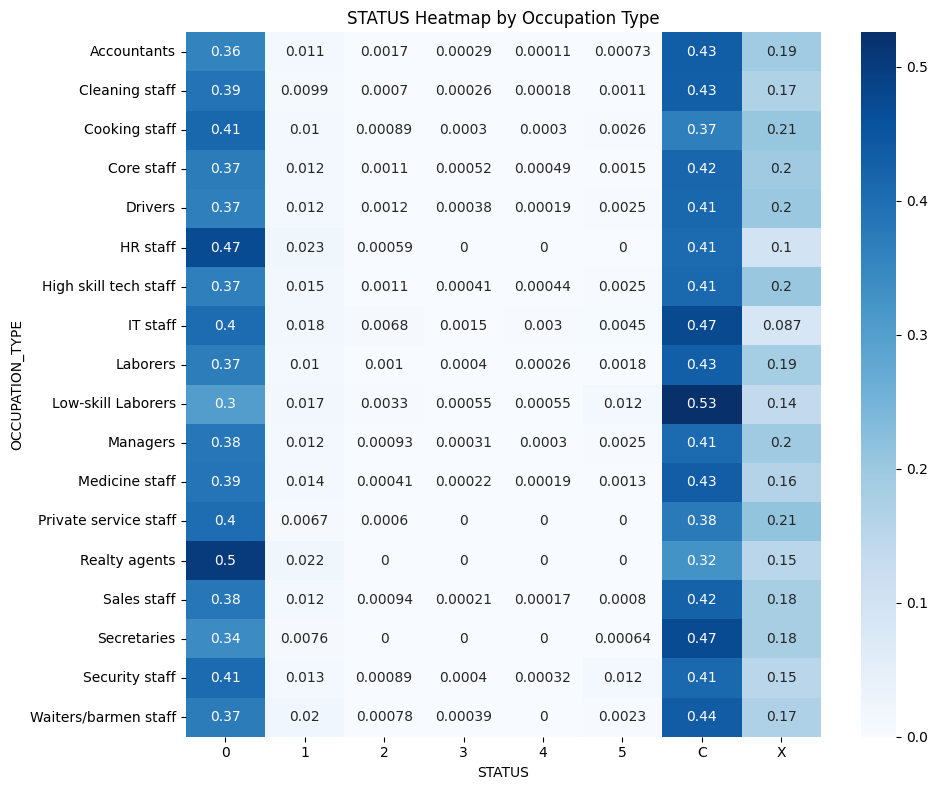

In [ ]:
pivot_table = pd.crosstab(df['OCCUPATION_TYPE'], df['STATUS'], normalize='index')
plt.figure(figsize=(10,8))
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title('STATUS Heatmap by Occupation Type')
plt.tight_layout()
plt.show()


___

In [ ]:
import plotly.express as px
edu_counts = df['NAME_EDUCATION_TYPE'].value_counts().reset_index()
edu_counts.columns = ['Education', 'Count']

fig = px.treemap(edu_counts, path=['Education'], values='Count', color='Count', color_continuous_scale='Blues')
fig.update_layout(title='Treemap of Education Type')
fig.show()

___

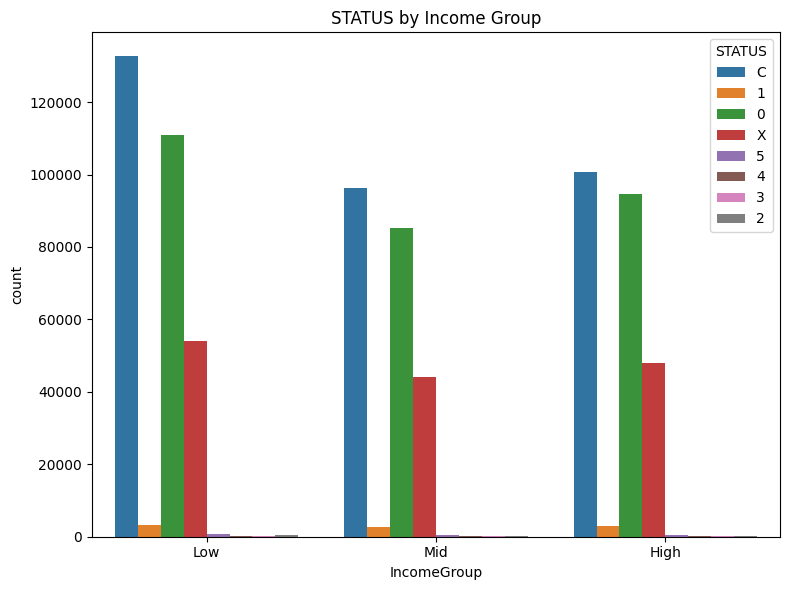

In [ ]:
# Kategorisasi income
df['IncomeGroup'] = pd.qcut(df['AMT_INCOME_TOTAL'], q=3, labels=['Low', 'Mid', 'High'])

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='IncomeGroup', hue='STATUS')
plt.title('STATUS by Income Group')
plt.tight_layout()
plt.show()

___

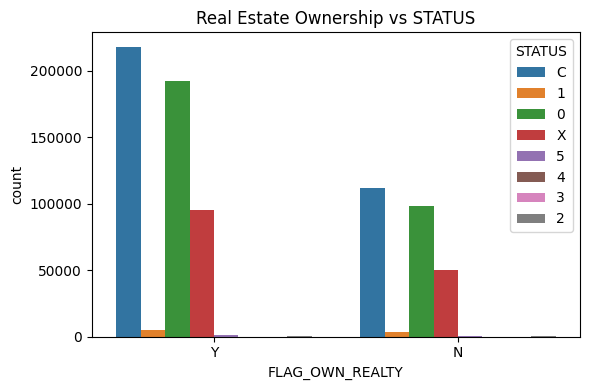

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='FLAG_OWN_REALTY', hue='STATUS')
plt.title('Real Estate Ownership vs STATUS')
plt.tight_layout()
plt.show()

___

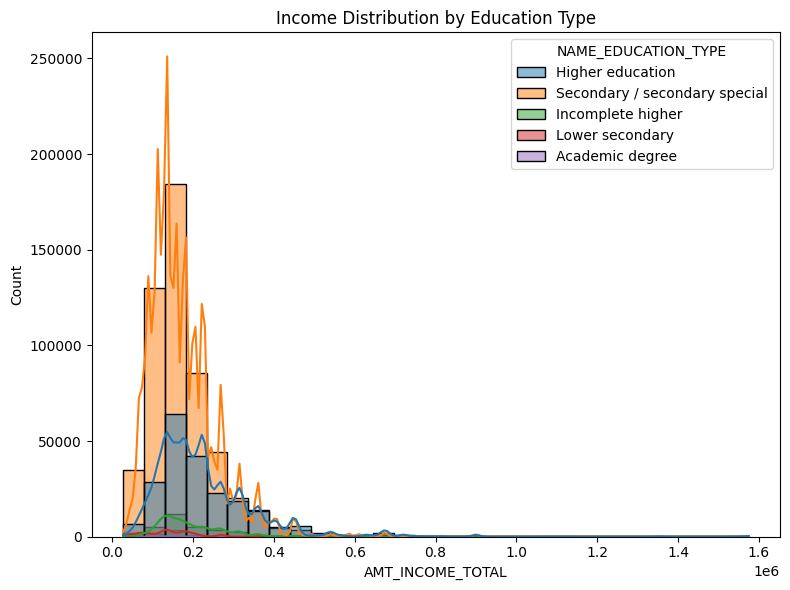

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='AMT_INCOME_TOTAL', hue='NAME_EDUCATION_TYPE', kde=True, bins=30)
plt.title('Income Distribution by Education Type')
plt.tight_layout()
plt.show()

___

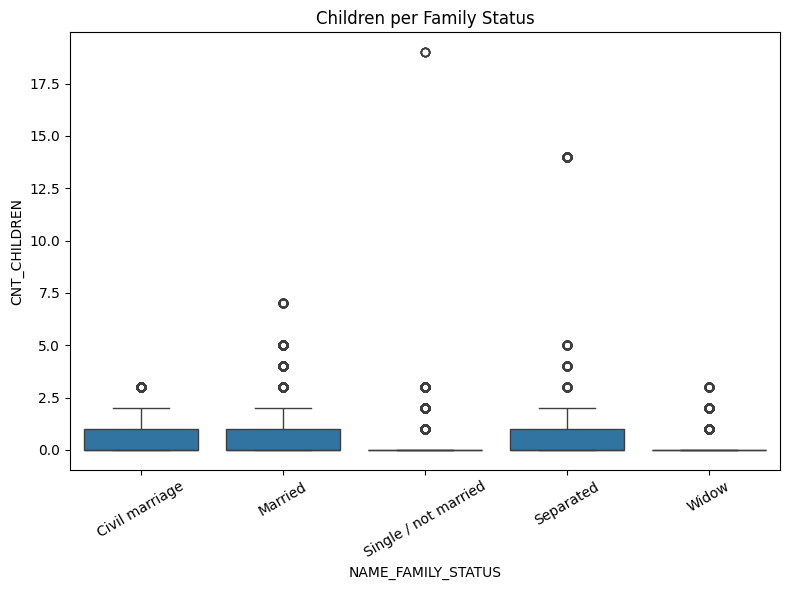

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='NAME_FAMILY_STATUS', y='CNT_CHILDREN')
plt.title('Children per Family Status')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

___

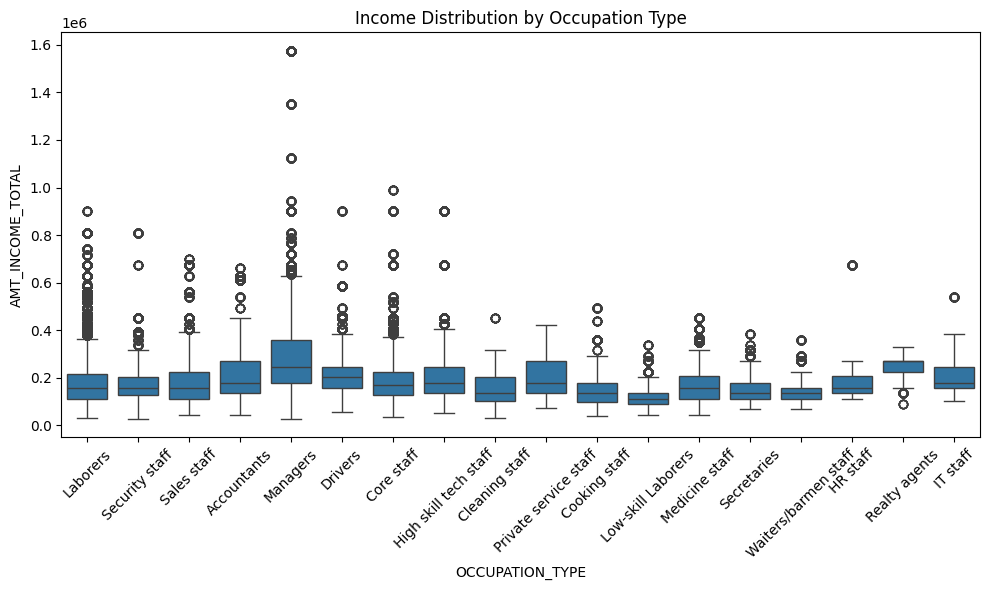

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL')
plt.xticks(rotation=45)
plt.title('Income Distribution by Occupation Type')
plt.tight_layout()
plt.show()

___

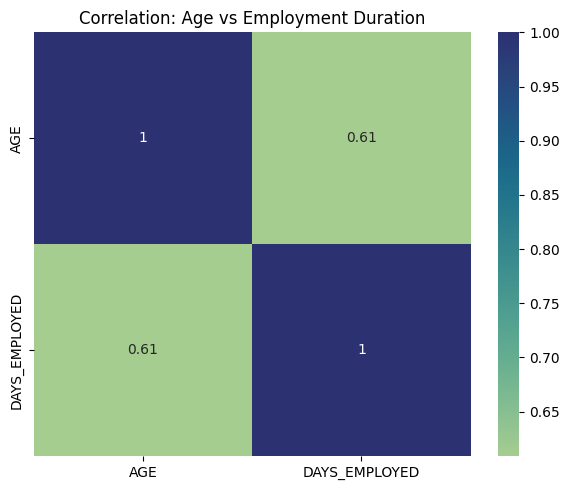

In [ ]:
df['AGE'] = (-df['DAYS_BIRTH']) // 365

plt.figure(figsize=(6,5))
sns.heatmap(df[['AGE', 'DAYS_EMPLOYED']].corr(), annot=True, cmap='crest')
plt.title('Correlation: Age vs Employment Duration')
plt.tight_layout()
plt.show()

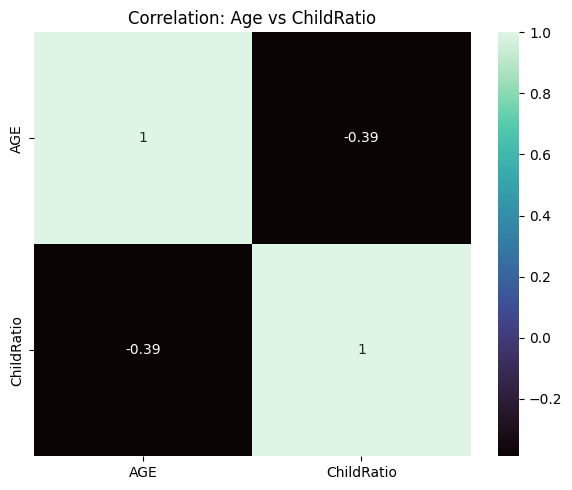

In [ ]:
df['ChildRatio'] = df['CNT_CHILDREN'] / df['CNT_FAM_MEMBERS'].replace(0, np.nan)

plt.figure(figsize=(6,5))
sns.heatmap(df[['AGE', 'ChildRatio']].corr(), annot=True, cmap='mako')
plt.title('Correlation: Age vs ChildRatio')
plt.tight_layout()
plt.show()

___

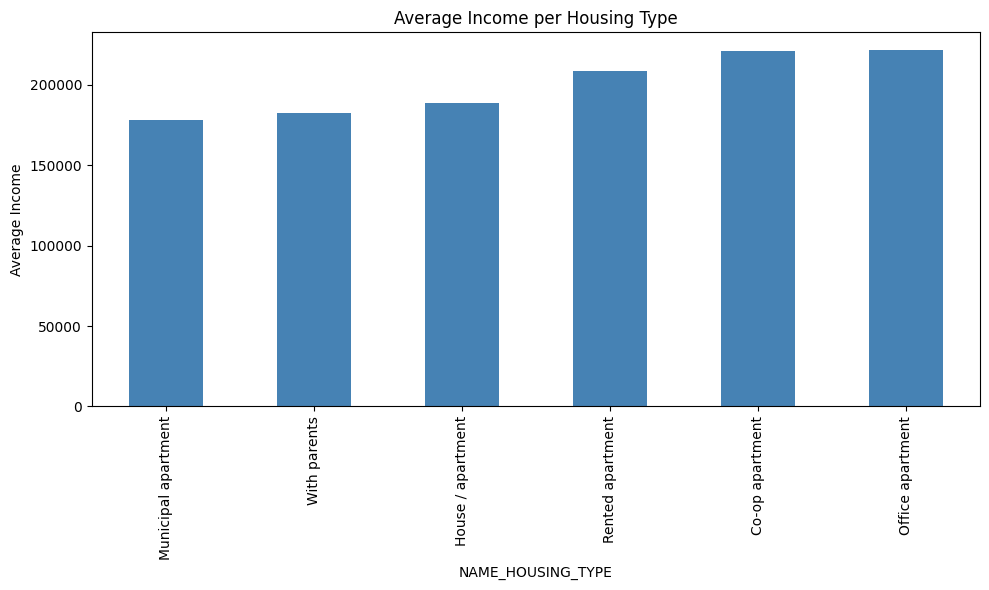

In [ ]:
housing_income = df.groupby('NAME_HOUSING_TYPE')['AMT_INCOME_TOTAL'].mean().sort_values()

plt.figure(figsize=(10,6))
housing_income.plot(kind='bar', color='steelblue')
plt.title('Average Income per Housing Type')
plt.ylabel('Average Income')
plt.tight_layout()
plt.show()


___

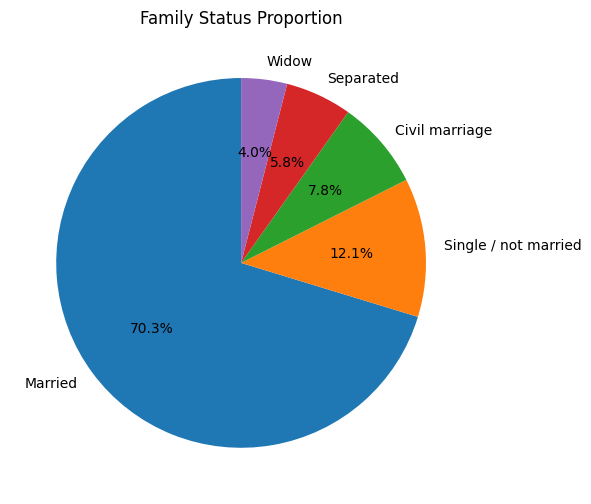

In [ ]:
labels = df['NAME_FAMILY_STATUS'].value_counts().index
sizes = df['NAME_FAMILY_STATUS'].value_counts().values

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Family Status Proportion')
plt.tight_layout()
plt.show()

___

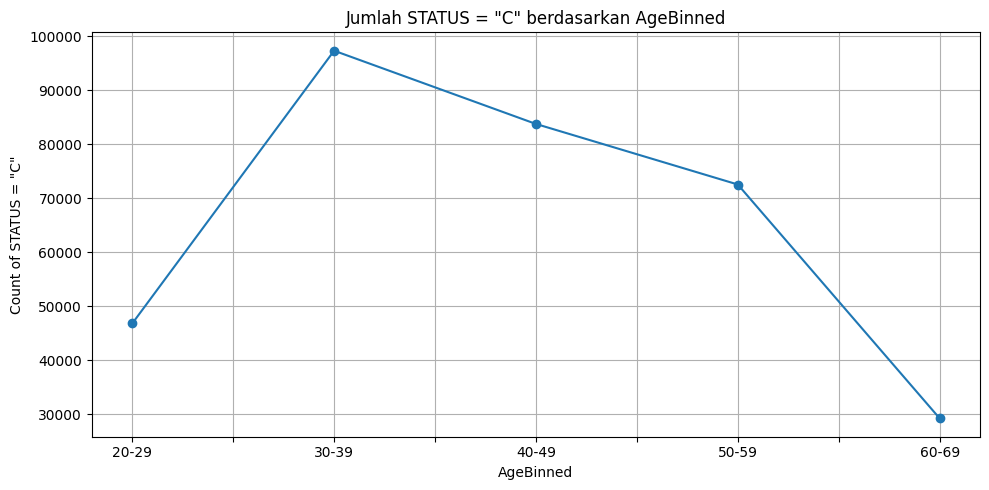

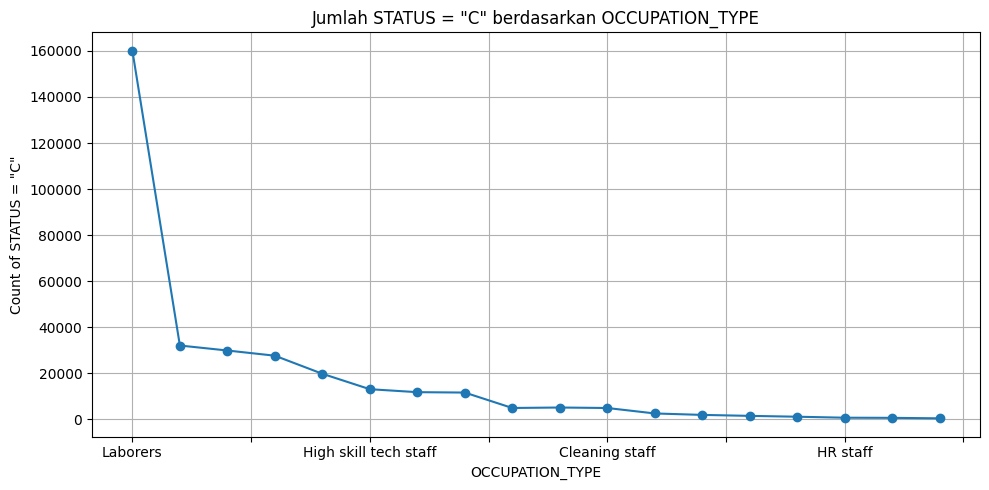

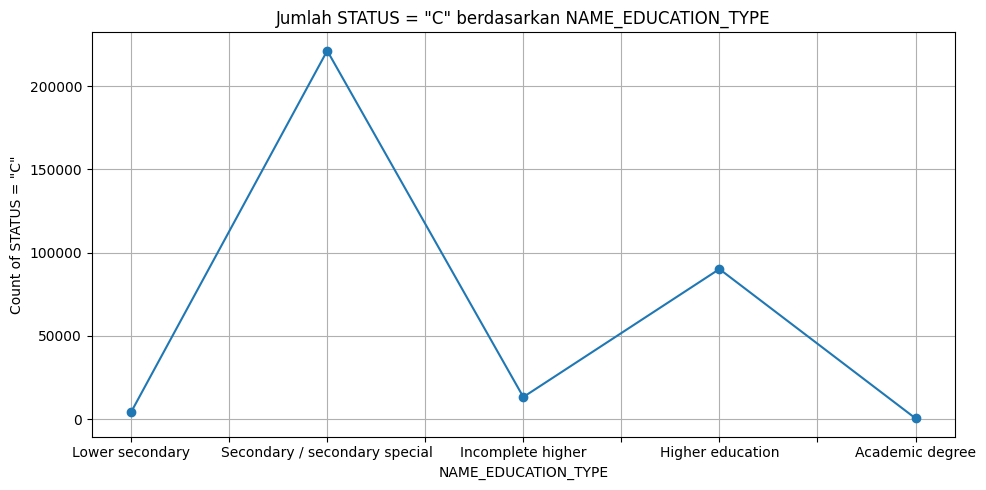

In [ ]:
# Define AGE bins
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]
df["AgeBinned"] = pd.cut(df["AGE"], bins=age_bins, labels=age_labels)

# Sort OCCUPATION_TYPE berdasarkan frekuensi
occupation_order = df['OCCUPATION_TYPE'].value_counts().index.tolist()
df['OCCUPATION_TYPE'] = pd.Categorical(df['OCCUPATION_TYPE'], categories=occupation_order, ordered=True)

# Sort NAME_EDUCATION_TYPE manual
education_order = [
    "Lower secondary",
    "Secondary / secondary special",
    "Incomplete higher",
    "Higher education",
    "Academic degree"
]
df['NAME_EDUCATION_TYPE'] = pd.Categorical(df['NAME_EDUCATION_TYPE'], categories=education_order, ordered=True)

# Filter hanya STATUS == "C"
df_c = df[df['STATUS'] == "C"]

# Fitur yang ingin dianalisis
features = ["AgeBinned", "OCCUPATION_TYPE", "NAME_EDUCATION_TYPE"]

# Plot jumlah STATUS == "C" berdasarkan fitur
for feature in features:
    df_c.groupby(feature, observed=True)["STATUS"].count().plot(
        kind="line", marker="o", figsize=(10,5)
    )
    plt.title(f'Jumlah STATUS = "C" berdasarkan {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count of STATUS = "C"')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Hapus bin sementara
df.drop("AgeBinned", axis=1, inplace=True)

___